In [1]:
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import cv2 as cv

2024-11-13 15:45:15.447659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Load training data from 'asl_dataset_augmented' folder with target size 224x224 and grayscale mode
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'asl_dataset_augmented',
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(224, 224),
    color_mode='grayscale',
    batch_size=32
)

# Load validation data
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'asl_dataset_augmented',
    validation_split=0.1,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(224, 224),
    color_mode='grayscale',
    batch_size=32
)

# Load test data (using the same validation split for simplicity)
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'asl_dataset_augmented',
    validation_split=0.1,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(224, 224),
    color_mode='grayscale',
    batch_size=32
)

Found 62507 files belonging to 36 classes.
Using 50006 files for training.
Found 62507 files belonging to 36 classes.
Using 6250 files for validation.
Found 62507 files belonging to 36 classes.
Using 6250 files for validation.


In [ ]:
def preprocessing(img):
    edges = cv.Canny(img, 100, 200)
    return edges



datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,      
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1,  
    horizontal_flip=True,
    validation_split=0.2
)

# Load training data from 'asl_dataset' folder with target size 224x224 and grayscale mode
train_generator = datagen.flow_from_directory(
    'asl_dataset_augmented',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    'asl_dataset_augmented',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
# Load test data
test_generator = datagen.flow_from_directory(
    'asl_dataset_augmented',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 50006 images belonging to 36 classes.
Found 12501 images belonging to 36 classes.


In [3]:

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(224,224,1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(72, activation='relu'),
    layers.Dense(36, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 72)             │    24,920,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         2,628 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,015,436 (95.43 MB)

 Trainable params: 25,015,436 (95.43 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50, 
    batch_size=128
)

print(model.evaluate(train_generator, validation_generator))

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 234/1563 ━━━━━━━━━━━━━━━━━━━━ 31:38 1s/step - accuracy: 0.0998 - loss: 3.3694

KeyboardInterrupt: 

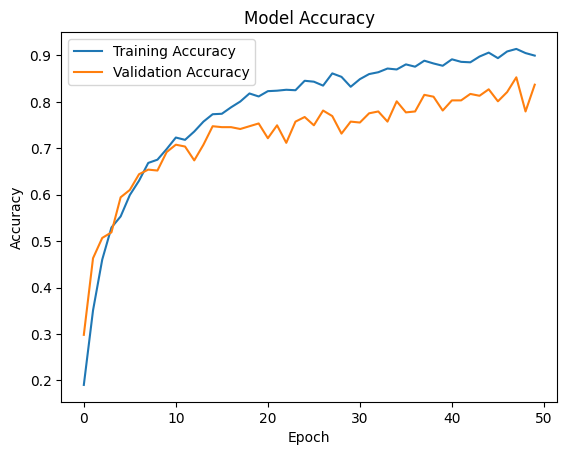

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
